In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')

# Use pd.read_csv() to read the CSV file into a DataFrame
df = pd.read_csv('/content/netflix_titles_2021 - netflix_titles_2021.csv')
df.head()

df.columns
df.shape
No_of_columns=len(df.columns)
No_of_columns
no_of_rows=len(df)
no_of_rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Check For **Missing** **Values**

In [ ]:
df.isna().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Removing Null Values in Duration,Rating & Date_added as the null values is significantly less.

In [ ]:
import pandas as pd

# Columns to check for dropping
columns_to_check = ['duration', 'rating', 'date_added']

df_clean1=df.dropna(subset=columns_to_check)
# df_clean1.isna().sum()
df_clean1.isna().sum()
df_clean1['director']=df_clean1['director'].fillna('Unknown')
df_clean1['cast']=df_clean1['cast'].fillna('Unknown')
df_clean1['country']=df_clean1['country'].fillna('Unknown')
df_clean1.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df_clean1['cast'].tail()

,cast
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,Unknown
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."
8806,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan..."


Explore **Data types** of each **columns**.


```
**# This is formatted as code**
```



In [ ]:
df_clean1.dtypes
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
df_clean1.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df_clean1['rating'].head()

,rating
0,PG-13
1,TV-MA
2,TV-MA
3,TV-MA
4,TV-MA


In [ ]:
df_clean1['date_added'].head()

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"


Changed the datatype of **date_added to date time from object.**

In [ ]:
df_clean1['date_added']=pd.to_datetime(df_clean1['date_added'])
df_clean1['date_added'].head()

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24


Summarise** the Central Tendency of dataframe after removing null values.50% Data is Median value.**


In [ ]:
df_clean1.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


Exploring Distribution of** Categorical Features - e.g, Type,Country,Rating & Listed_in columns.**
\**bold text** **bold text**

In [ ]:
# Exploring the distribution of categorical columns
categorical_columns = ['type', 'country', 'rating', 'listed_in']

# Get value counts for each categorical column
categorical_distributions = {col  :       df_clean1[col].value_counts() for col in categorical_columns}

# Compute mean, median, and mode for numerical columns
# numerical_summary = netflix_data[numerical_columns].agg(['mean', 'median', lambda x: x.mode()[0]])

categorical_distributions


{'type': type
 Movie      6126
 TV Show    2664
 Name: count, dtype: int64,
 'country': country
 United States                             2809
 India                                      972
 Unknown                                    829
 United Kingdom                             418
 Japan                                      243
                                           ... 
 Romania, Bulgaria, Hungary                   1
 Uruguay, Guatemala                           1
 France, Senegal, Belgium                     1
 Mexico, United States, Spain, Colombia       1
 United Arab Emirates, Jordan                 1
 Name: count, Length: 749, dtype: int64,
 'rating': rating
 TV-MA       3205
 TV-14       2157
 TV-PG        861
 R            799
 PG-13        490
 TV-Y7        333
 TV-Y         306
 PG           287
 TV-G         220
 NR            79
 G             41
 TV-Y7-FV       6
 NC-17          3
 UR             3
 Name: count, dtype: int64,
 'listed_in': listed_in
 Dramas, Inte

Create a **Histogram plot to visualise distribution of Numerical Features**

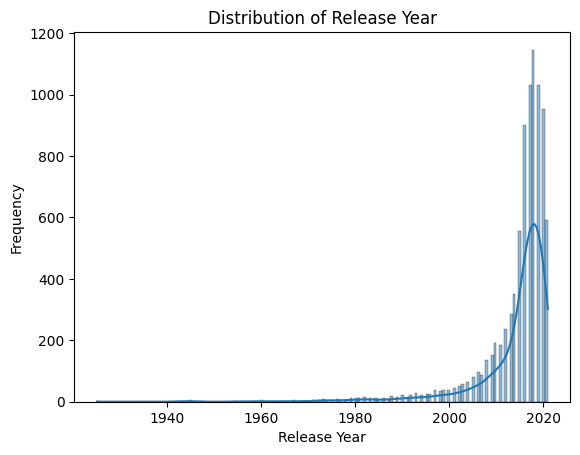

In [ ]:
sns.histplot(x='release_year',data=df_clean1,kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

**Bar chart & Pie chart to visulise type category**


1.   

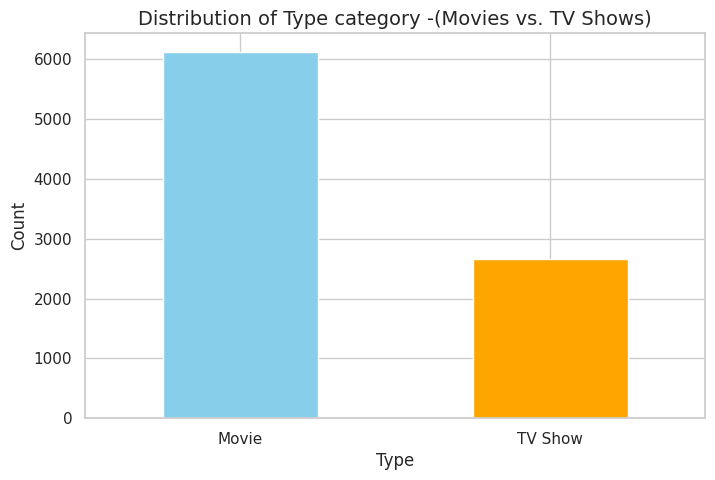

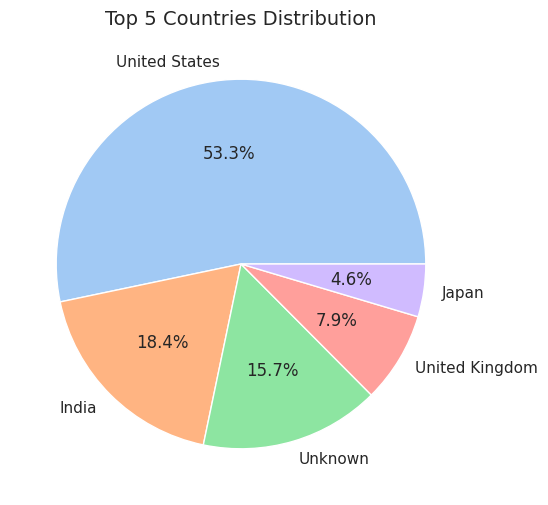

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set(style="whitegrid")

# 1. Bar chart for the 'type' column
plt.figure(figsize=(8, 5))
type_counts = df_clean1['type'].value_counts()
type_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Type category -(Movies vs. TV Shows)', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 2. Pie chart for the top 5 countries by count
top_countries = df_clean1['country'].value_counts().head()
plt.figure(figsize=(6, 6))
top_countries.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Top 5 Countries Distribution', fontsize=14)
plt.ylabel('')  # Hide y-label for pie chart
plt.show()



**Use boxplots to compare distributions across different groups or categories.**


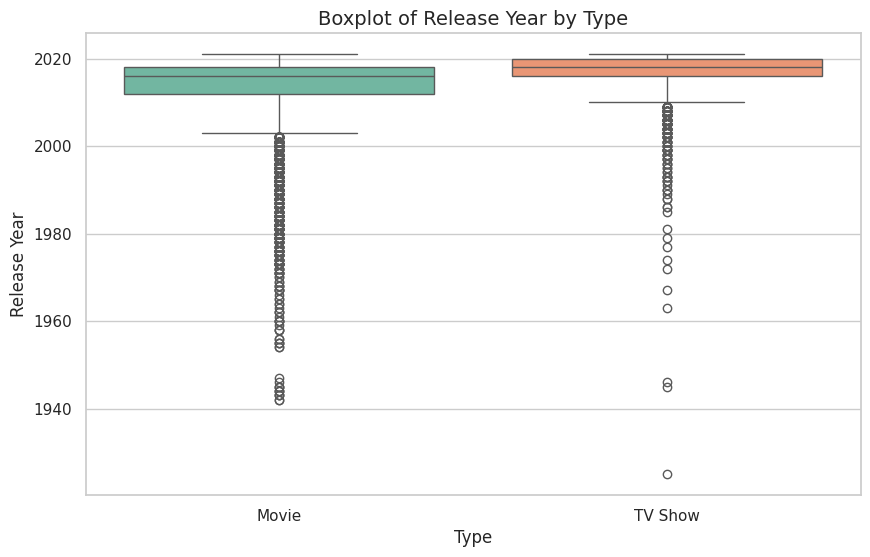

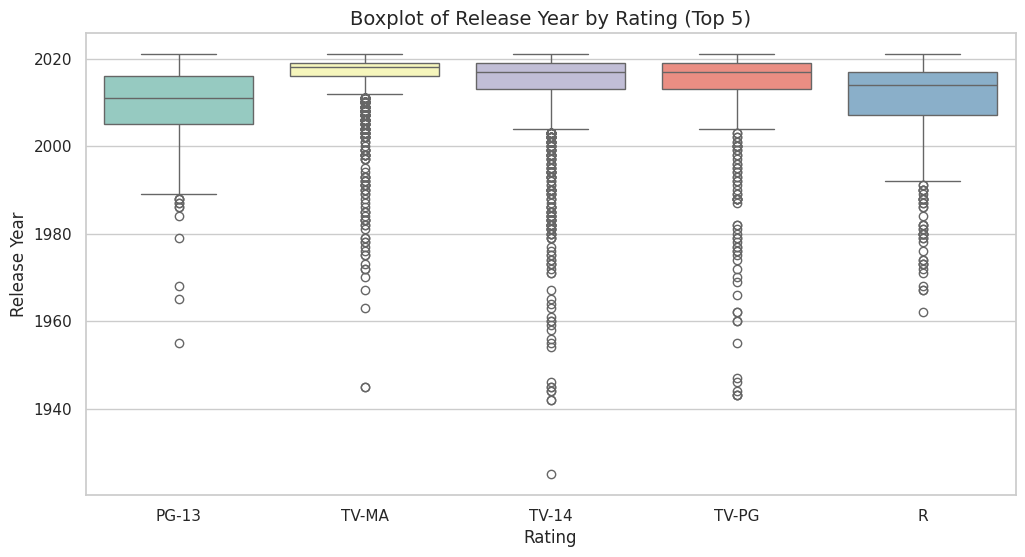

In [ ]:
# 3. Boxplot to compare 'release_year' across 'type' (Movies and TV Shows)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean1, x='type', y='release_year', palette="Set2")
plt.title('Boxplot of Release Year by Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Release Year', fontsize=12)
plt.show()

# 4. Boxplot to compare 'release_year' across top 5 ratings
top_ratings = df_clean1['rating'].value_counts().head().index
filtered_data = df_clean1[df_clean1['rating'].isin(top_ratings)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='rating', y='release_year', palette="Set3")
plt.title('Boxplot of Release Year by Rating (Top 5)', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Release Year', fontsize=12)
plt.show()



Explore relationships between variables using scatter plots or correlation matrices.
**bold text****



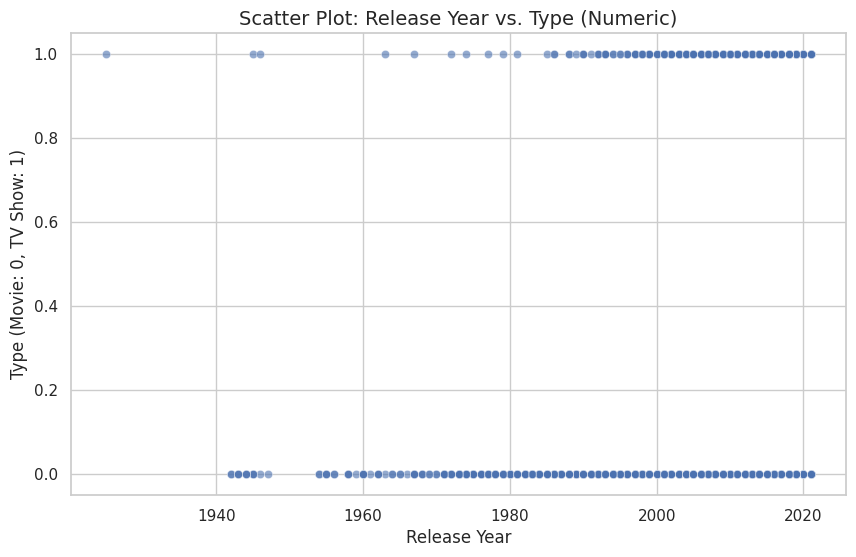

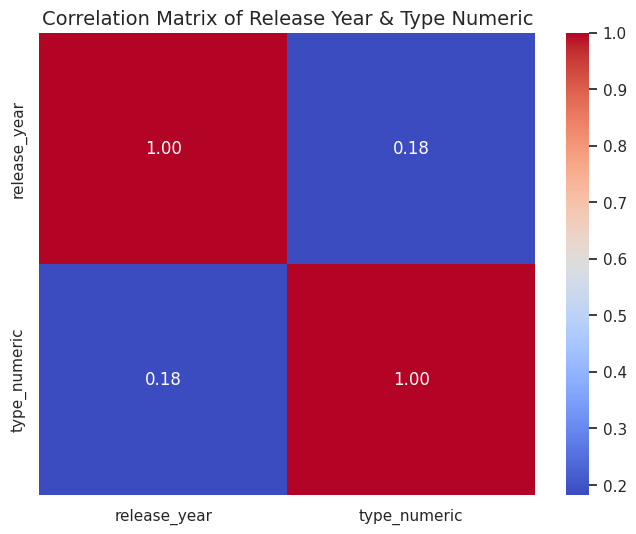

In [ ]:

# Convert type to numerical for scatter plot
type_mapping = {'Movie': 0, 'TV Show': 1}
df_clean1['type_numeric'] = df_clean1['type'].map(type_mapping)

# Scatter plot: release_year vs. type_numeric
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean1, x='release_year', y='type_numeric', alpha=0.6, palette="muted")
plt.title('Scatter Plot: Release Year vs. Type (Numeric)', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Type (Movie: 0, TV Show: 1)', fontsize=12)
plt.show()

# Generate correlation matrix for numerical variables
correlation_matrix = df_clean1[['release_year', 'type_numeric']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Release Year & Type Numeric', fontsize=14)
plt.show()


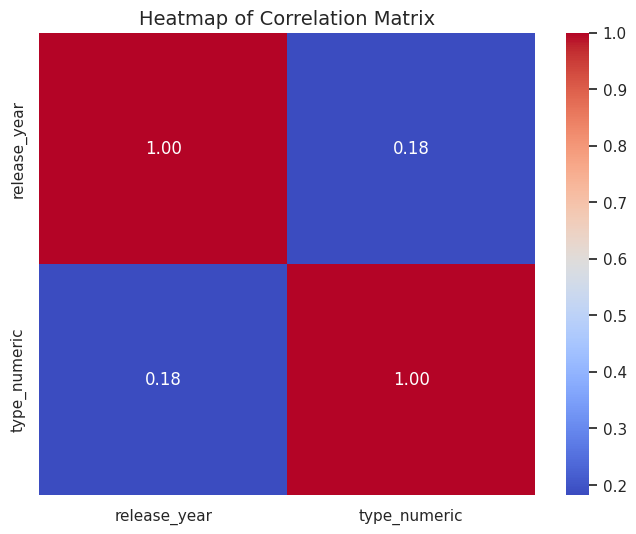

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_clean1[['release_year', 'type_numeric']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix', fontsize=14)
plt.show()


**Employ Seaborn to create more advanced visualizations like pairplots, heatmaps, etc.**
**bold text**




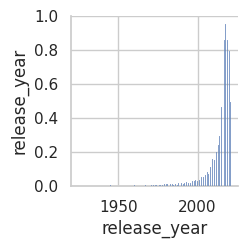

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have numerical columns like 'release_year', 'rating', etc.
sns.pairplot(df[['release_year','duration']])
plt.show()

In [ ]:
corr_matrix = df_clean1[['release_year','duration']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

ValueError: could not convert string to float: '90 min'

**Insights & Conclusions **
Summarize key findings from the EDA.




Movies & TV Shows contents are mostly distributed in USA followed by India. About 60% of Movies & TV shows are from USA. Out of total 5 Type(movies+Tv Shows), 3 are from US. Indian Movies & TV Shows comes second with almost 30%.
From Histogram plot between release year and count.We can see that the release was low in 1940's,50's.It drastically surged ahead from 2010 onwards to reach peak point somewhere around 2017.since then it is going down.
With the increase in release years, the duration time decreases according to Heatmap.

**Discuss any interesting patterns or relationships discovered.**

---







With heatmap plot showing relationship between Release Year & Duration of Movies & TV Shows. We find that the duration of Movies& TV shows decreases with release year.
For Box Plot (Rating Vs Release Years);The median of release years is significantly higher for TV-MA Rating; it suggest a preference for newer content in that category. Average duration was highest for NC 17 Rating.

In [ ]:
df_clean1[['release_year','type_numeric']]

**1. Analyze the growth of Movies and TV Shows over the years. Has the addition of new content been consistent, or are there periods of significant increase or decrease?**

In [ ]:
growth_data=df_clean1.groupby(['release_year','type']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(growth_data,x='release_year',y='count',hue='type',marker='o')
plt.title("Growth of movies and tv shows over years")
plt.grid(True)
plt.show()

**2.Explore the distribution of listed_in genres. Which genres are most prevalent, and is there a difference in genre distribution between Movies and TV Shows**

In [ ]:
genre_dis=df_clean1.groupby(['listed_in','type']).size().reset_index(name='count')

movies=genre_dis[genre_dis['type']=='Movie']
tvshows=genre_dis[genre_dis['type']=='TV Show']

top10_movies=movies.nlargest(10,'count')

plt.figure(figsize=(14,7))
sns.barplot(data=top10_movies, x='count',y='listed_in')
plt.title("Top 10 Genre Distribution in Movies")
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


**3. Analyze the distribution of content across different country of origin. Are there dominant countries or regions contributing to the Netflix library?**


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

country_wise=df_clean1.groupby(['country','type']).size().reset_index(name='count')
movies_countries=country_wise[country_wise['type']=="Movie"]
tvshows_countries=country_wise[country_wise['type']=="TV Show"]

top10_movies=movies_countries.nlargest(10,'count')
plt.figure(figsize=(14,7))
# Pass 'top10_movies' as the 'data' argument, and 'count', 'country' as 'x', 'y' respectively.
sns.barplot(data=top10_movies, x='count', y='country')
plt.title("Top 10 Countries Contributing to Movies")
plt.xlabel('Count')
plt.show()

**4.Explore the distribution of Duration with Movies and TV shows.Are there noticeble trends & Differences in Content Length.**

In [ ]:
df_clean1['duration'].dtypes

dtype('O')

In [ ]:
df_clean1['duration_numeric'] = df_clean1.apply(lambda x: int(x['duration'].split()[0]) if x['type'] == 'Movie' else None, axis=1)
plt.figure(figsize=(14,7))
sns.histplot(data=df_clean1[df_clean1['type']=="Movie"], x='duration_numeric',bins=30,kde=True,color="blue")
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (Min)")
plt.ylabel("Frequency")
plt.show()

df_clean1['season_num']=df_clean1.apply(lambda x: int(x['duration'].split()[0]) if x['type']=='TV Show' else None,axis=1)
plt.figure(figsize=(14,7))
sns.histplot(data=df_clean1[df_clean1['type']=="Movie"], x='duration_numeric',bins=30,kde=True,color="blue")
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (Min)")
plt.ylabel("Frequency")
plt.show()


Analyze the distribution of content across different rating categories. Are certain rating categories more prevalent than others?bold text
**bold text**

In [ ]:
df_clean1['type'].isna().sum()
df_clean1['duration'].isna().sum()
df_clean1.dropna(subset=['duration'],inplace=True)
df_clean1['duration'].isna().sum()
df_clean1['type'] = df_clean1['type'].str.strip()  # Remove leading/trailing whitespace
movies=df_clean1[df_clean1['type']=='movies']
df_clean1['type'].isna().sum()
df_clean1['duration'].isna().sum()
df_clean1.dropna(subset=['duration'],inplace=True)
df_clean1['duration'].isna().sum()
df_clean1['type'] = df_clean1['type'].str.strip()  # Remove leading/trailing whitespace
movies=df_clean1[df_clean1['type']=='movie']
TV_show=df_clean1[df_clean1['type']=='TV Show']
plt.hist(movies['duration'], bins=20, label='Movies')
plt.hist(TV_show['duration'], bins=20,label='TV Show')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.title('Distribution of Movie and TV Show Durations')
plt.legend()
plt.show()
plt.legend()
plt.show()

**5. Analyze the distribution of content across different rating categories. Are certain rating categories more prevalent than others?**


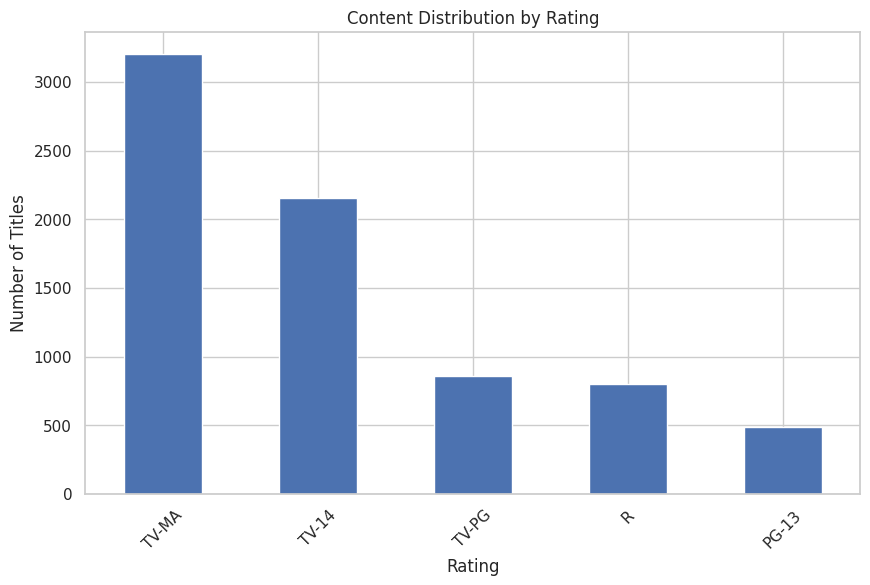

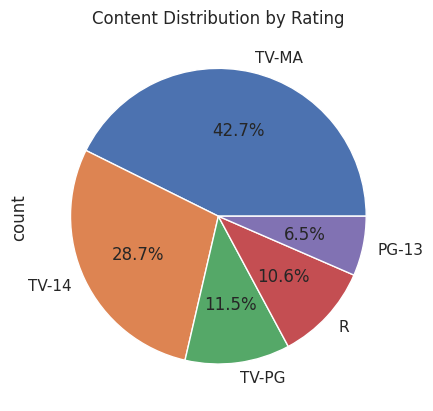

In [ ]:
rating_counts = df_clean1['rating'].value_counts().head()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.title('Content Distribution by Rating')
plt.xticks(rotation=45)
plt.show()

# Or, for a pie chart:
rating_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Content Distribution by Rating')
plt.show()

Yes TV-MA is having about 42.7% market share. It is prevalent over others.
**bold text**
---

bold text

**6.Investigate the number of titles released each year (release_year). Are there any patterns or significant changes in the volume of releases over time?**


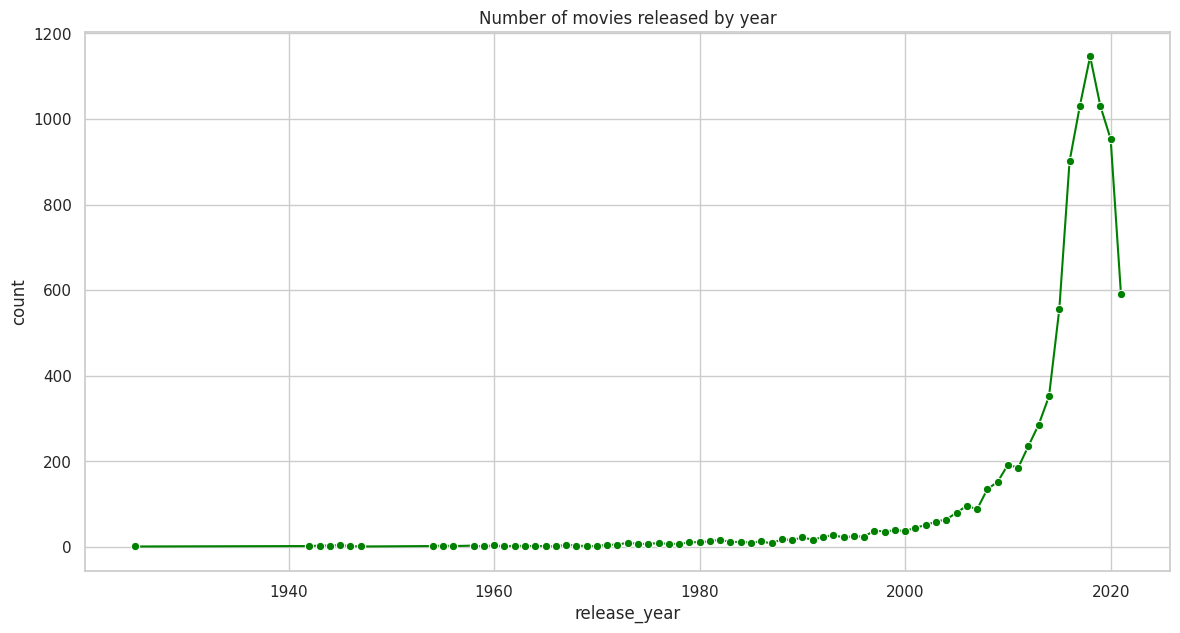

In [ ]:
release_year_dis=df_clean1.groupby('release_year').size().reset_index(name='count')

plt.figure(figsize=(14,7))
sns.lineplot(data=release_year_dis,x='release_year',y='count',marker="o",color='green')
plt.title("Number of movies released by year")
plt.grid(True)
plt.show()

The no of titles released each year  started increasing from 2000 and peaked somewhere around 2018 followed by decline.


7. **Analyze the distribution of content added to Netflix over different months or quarters. Are there periods with higher content addition activity?**


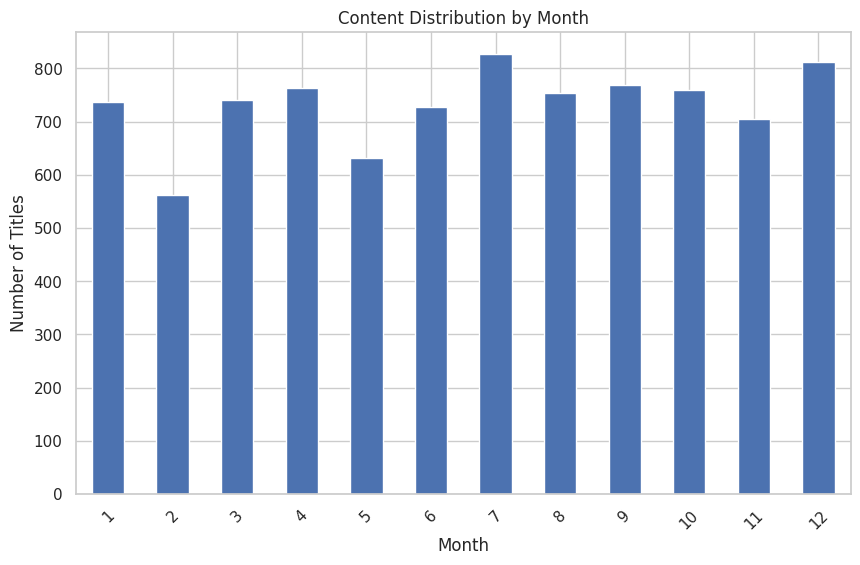

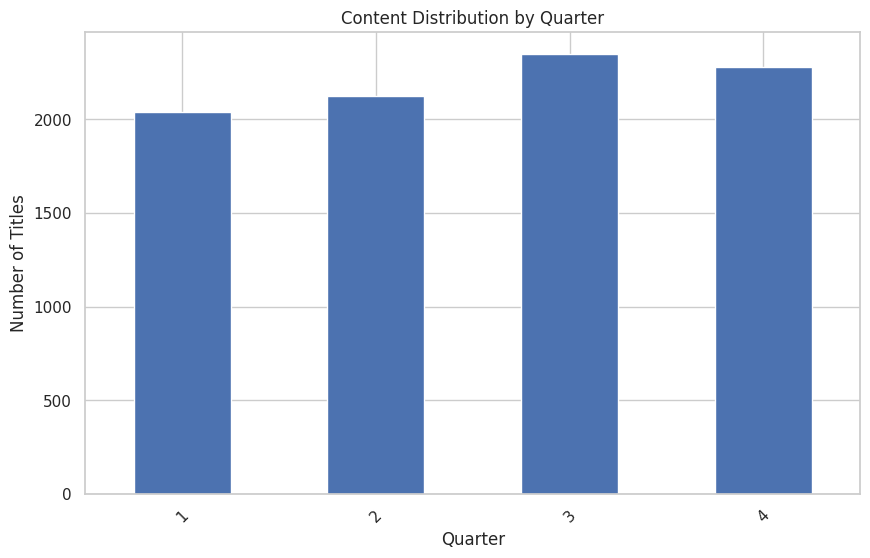

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract month and year
df_clean1['date_added'] = pd.to_datetime(df_clean1['date_added'])
df_clean1['month'] = df_clean1['date_added'].dt.month
df_clean1['year'] = df_clean1['date_added'].dt.year

# Count content by month
month_counts = df_clean1.groupby('month')['title'].count()

# Plot the distribution of content by month
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.title('Content Distribution by Month')
plt.xticks(rotation=45)
plt.show()

# Group by quarter
df_clean1['quarter'] = df_clean1['date_added'].dt.quarter

# Count content by quarter
quarter_counts = df_clean1.groupby('quarter')['title'].count()

# Plot the distribution of content by quarter
plt.figure(figsize=(10, 6))
quarter_counts.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Number of Titles')
plt.title('Content Distribution by Quarter')
plt.xticks(rotation=45)
plt.show()

Yes, Quarter 3 has highest content addition activity and 7th Month(July) has highest content addition activity.\

**8. Explore whether there are any patterns in the date_added for new content in terms of specific days of the week. **bold text**


In [ ]:
df_clean1['day_of_week_added']=df_clean1['date_added'].dt.day_name()

day_dis=df_clean1.groupby(['day_of_week_added','type']).size().reset_index(name='count')

plt.figure(figsize=(14,6))
sns.barplot(data=day_dis,x='day_of_week_added',y='count',hue='type',palette='viridis')
plt.title("Content Additions by day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Number of Additions")
plt.legend(title="Type")
plt.show()

**9. Identify the most frequent directors on the platform and explore the distribution of their content across different genres and rating categories. **bold text**

In [ ]:
director_count=df_clean1['director'].value_counts().reset_index()
director_count.columns=['director','count']
top_directors=director_count.head(10)
top_directors_data = df_clean1[df_clean1['director'].isin(top_directors['director'])]
genre_dis=top_directors_data.groupby(['director','listed_in']).size().reset_index(name='count').nlargest(10,'count')
rating_dis=top_directors_data.groupby(['director','rating']).size().reset_index(name='count')
plt.figure(figsize=(14,7))
sns.barplot(data=genre_dis,x='listed_in',y='count',hue='director',palette='viridis')
plt.xticks(rotation=45)
plt.title("Genre Distribution of Top Directors")
plt.xlabel("Genre")
plt.ylabel("No. of Directors")
plt.legend(title="Director")
plt.show()

plt.figure(figsize=(12,7))
sns.barplot(data=rating_dis,x='count',y='rating',hue='director',palette='viridis')
plt.title("Rating Distribution of Top Directors")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.legend(title="Director")
plt.show()


**10. Analyze the most frequent cast members and their involvement in different genres and content types. Do certain actors appear predominantly in specific genres or types of content?**
bold text

In [ ]:
df_clean1['cast']=df_clean1['cast'].astype("object")
df_clean1['cast'].dtypes

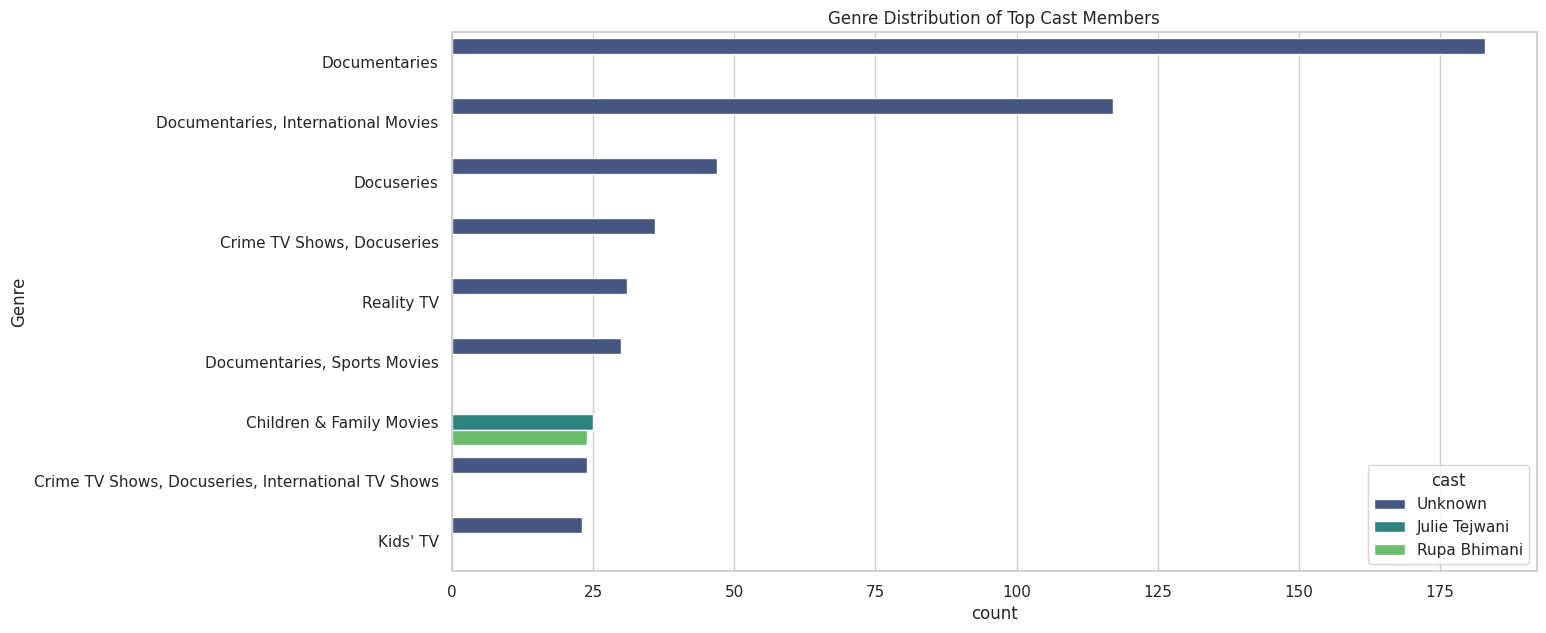

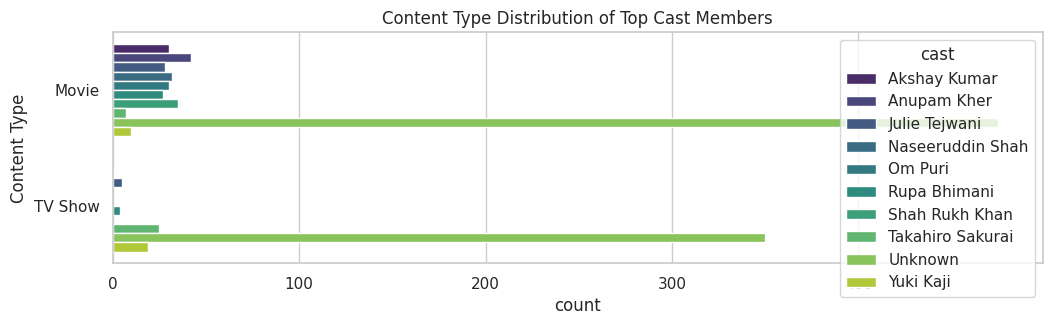

In [ ]:
#df_clean1['cast'].head()
df_clean1['cast']=df_clean1['cast'].str.split(', ')
df_clean1=df_clean1.explode('cast')

cast_count=df_clean1['cast'].value_counts().reset_index()
cast_count.columns=['cast','count']
top_cast=cast_count.head(10)
top_cast_data =df_clean1[df_clean1['cast'].isin(top_cast['cast'])]
genre_dis=top_cast_data.groupby(['cast','listed_in']).size().reset_index(name='count').nlargest(10,'count')
type_dis=top_cast_data.groupby(['cast','type']).size().reset_index(name='count')
plt.figure(figsize=(14,7))
sns.barplot(data=genre_dis,x='count',y='listed_in',hue='cast',palette='viridis')


plt.title("Genre Distribution of Top Cast Members")
plt.ylabel("Genre")
plt.show()
plt.figure(figsize=(12,3))

sns.barplot(data=type_dis,x='count',y='type',hue='cast',palette='viridis')
plt.title("Content Type Distribution of Top Cast Members")
plt.ylabel("Content Type")
plt.show()






**11. Analyze how the popularity of different genres (listed_in) has changed over time. Are there genres that have become more or less prevalent in recent years**





In [ ]:
genre_count = df_clean1['listed_in'].value_counts().reset_index()
genre_count.columns = ['listed_in', 'count']

# Filter the top 10 genres
top_genres = genre_count.head(3)['listed_in']

# Filter the data for the top 10 genres
top_genres_data = df_clean1[df_clean1['listed_in'].isin(top_genres)]

# Group by year and genre to count the number of titles added each year for each genre
genre_trend = top_genres_data.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

# Create line plot for genre popularity over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=genre_trend, x='release_year', y='count', hue='listed_in', palette='viridis')
plt.title("Top 10 Genre Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

** 12.Explore any potential relationship between content duration and its average rating. Do longer or shorter movies/shows tend to receive higher or lower ratings?**


In [ ]:
movies = df_clean1[df_clean1['type'] == 'Movie']
movie_ratings = movies[['duration_numeric', 'rating']].copy()
movie_ratings['duration_numeric'] = pd.to_numeric(movie_ratings['duration_numeric'])
average_duration_by_rating = movie_ratings.groupby('rating')['duration_numeric'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='rating', y='duration_numeric', data=average_duration_by_rating, marker='o')
plt.title('Average Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


KeyError: "['duration_numeric'] not in index"

13.Analyze the co-occurrence of different genres within the listed_in category. Are there genres that frequently appear together, suggesting potential hybrid genres or subgenres?


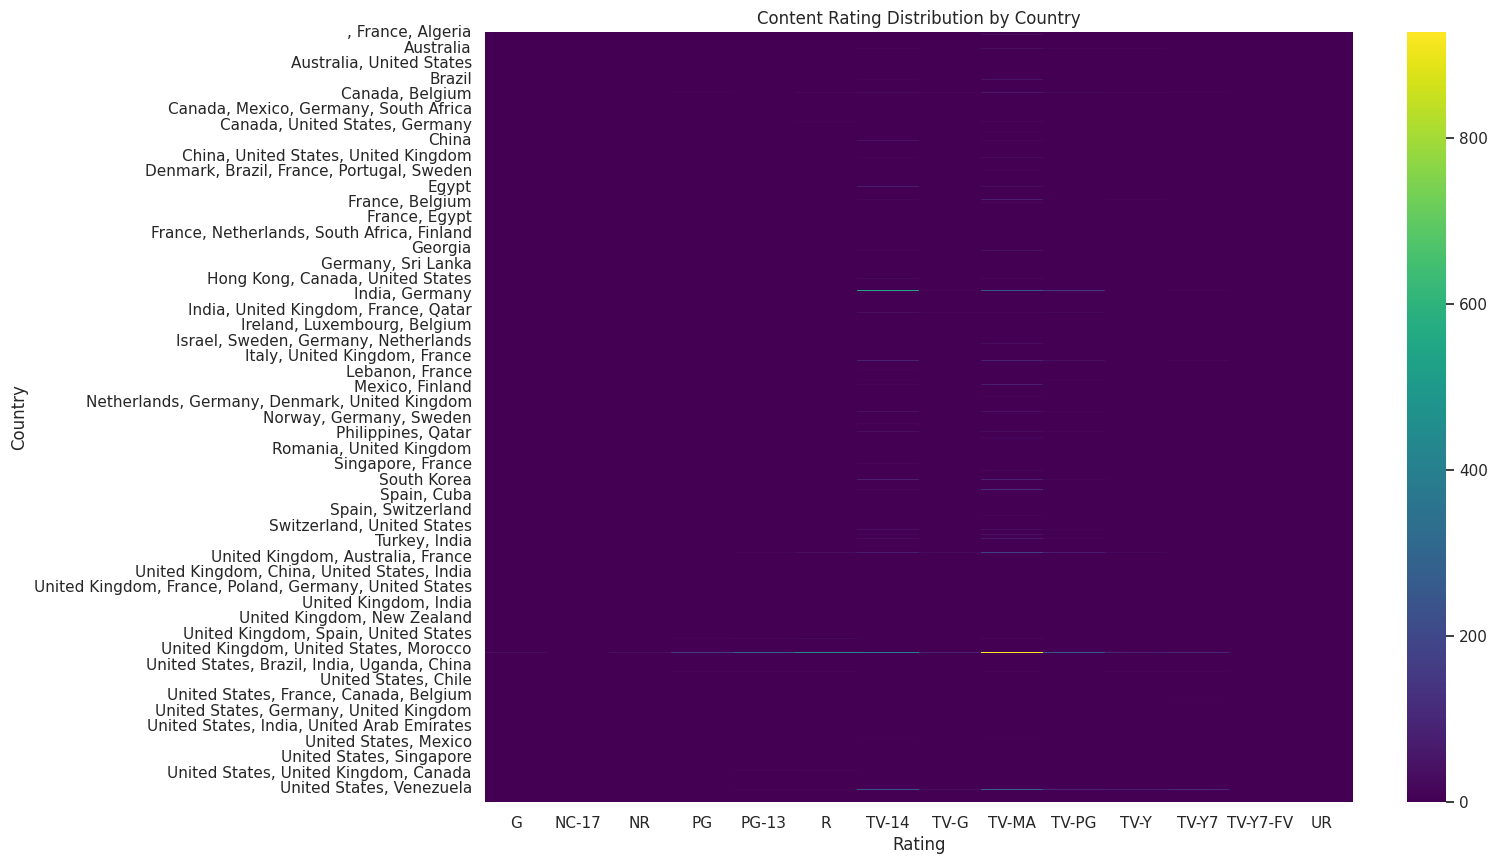

In [ ]:
df_clean1 = df_clean1.explode('country')


# Group by country and rating to count the number of titles for each combination
country_rating_dis = df_clean1.groupby(['country', 'rating']).size().reset_index(name='count')

# Pivot the data to create a matrix for the heatmap
country_rating_pivot = country_rating_dis.pivot(index='country', columns='rating', values='count').fillna(0)

# Create heatmap for content rating and country of origin
plt.figure(figsize=(14, 10))
sns.heatmap(country_rating_pivot, cmap='viridis')
plt.title("Content Rating Distribution by Country")
plt.xlabel("Rating")
plt.ylabel("Country")
plt.show() # Split the 'country' column to get individual countries








**14. Explore whether specific directors are associated with particular genres or content types.**


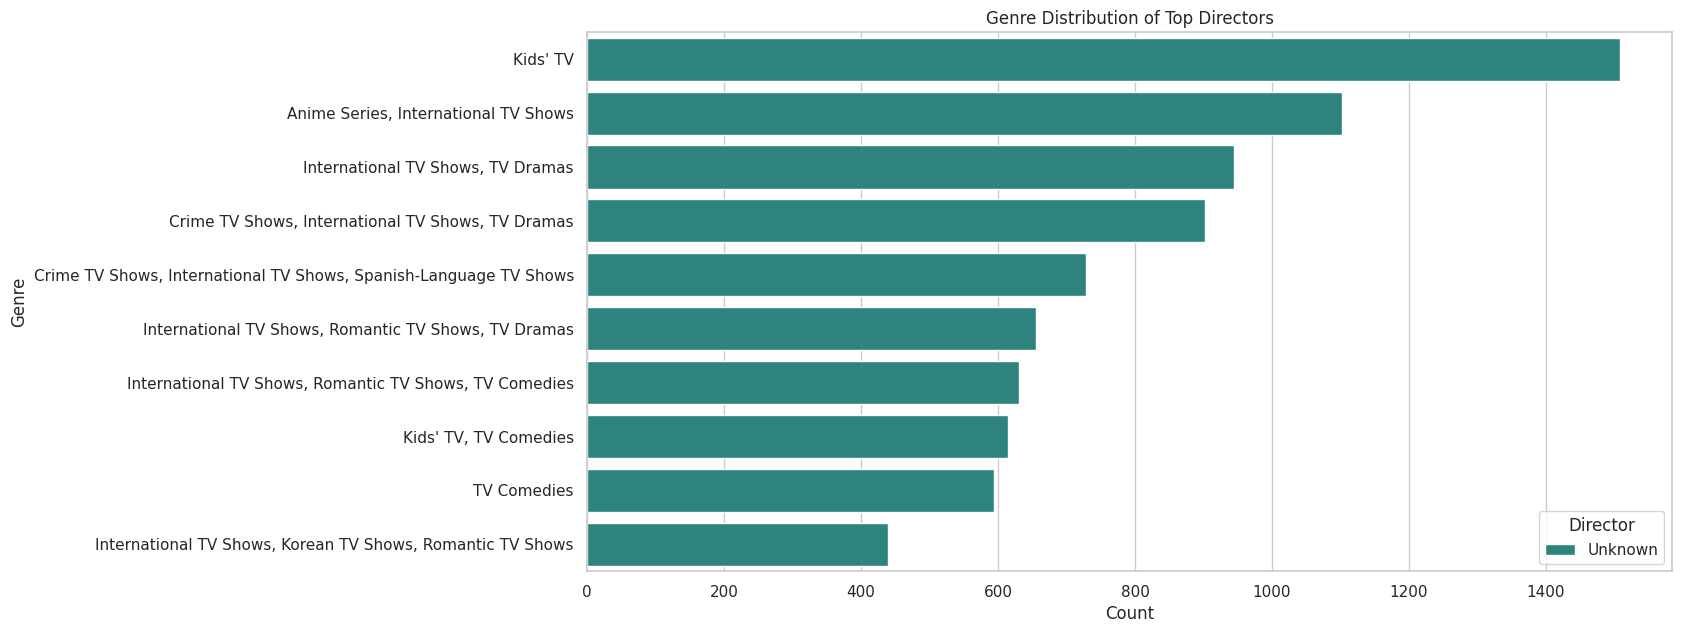

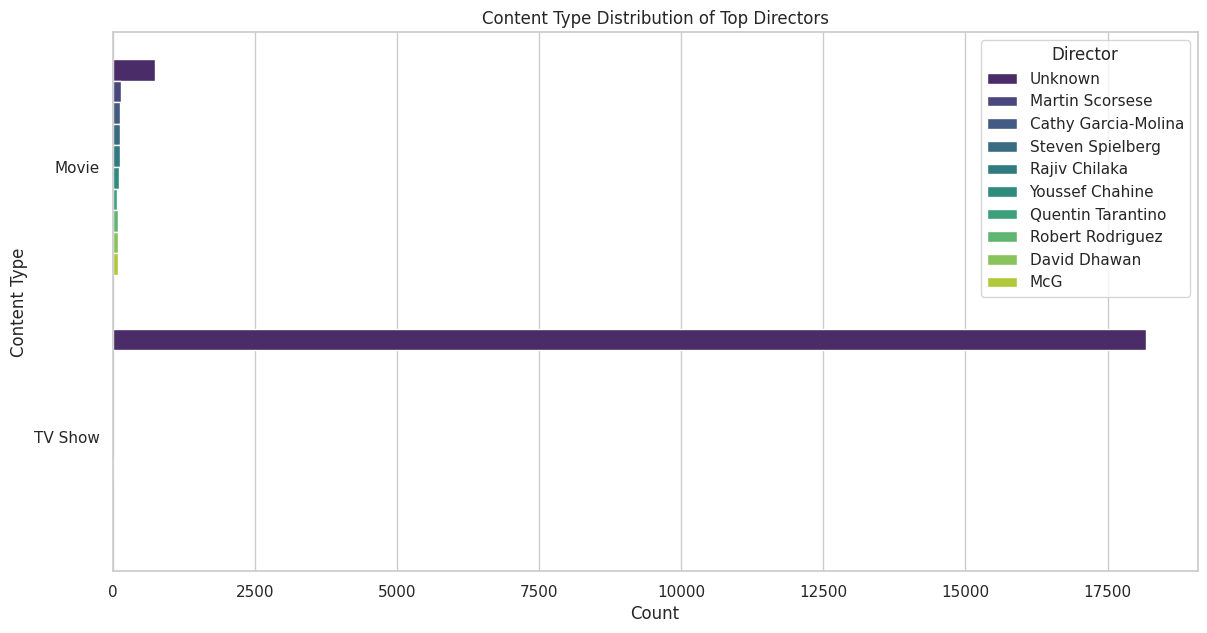

In [ ]:
director_count=df_clean1['director'].value_counts().reset_index()
director_count.columns=['director','count']
top_directors=director_count.head(10)

top_directors_data=df_clean1[df_clean1['director'].isin(top_directors['director'])]
genre_dis_list = []
type_dis_list = []

# Loop through each top director to get genre and content type distributions
for director in top_directors['director']:
    director_data = top_directors_data[top_directors_data['director'] == director]

    # Group by genre
    genre_dis = director_data.groupby(['director', 'listed_in']).size().reset_index(name='count')
    genre_dis_list.append(genre_dis)

    # Group by content type
    type_dis = director_data.groupby(['director', 'type']).size().reset_index(name='count')
    type_dis_list.append(type_dis)

# Concatenate the genre and content type distributions
genre_dis = pd.concat(genre_dis_list).nlargest(10,'count')
type_dis = pd.concat(type_dis_list)

# Create bar plot for genre distribution of top directors
plt.figure(figsize=(14, 7))
sns.barplot(data=genre_dis, x='count', y='listed_in', hue='director', palette='viridis')
plt.title("Genre Distribution of Top Directors")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.legend(title="Director")
plt.show()

# Create bar plot for content type distribution of top directors
plt.figure(figsize=(14, 7))
sns.barplot(data=type_dis, x='count', y='type', hue='director', palette='viridis')
plt.title("Content Type Distribution of Top Directors")
plt.xlabel("Count")
plt.ylabel("Content Type")
plt.legend(title="Director")
plt.show()




*15.Analyze whether certain cast members tend to appear more frequently in specific genres or content types. **bold text**



In [ ]:
df_clean1['cast']=df_clean1['cast'].str.split(', ')
df_clean1=df_clean1.explode('cast')

cast_count=df_clean1['cast'].value_counts().reset_index()
cast_count.columns=['cast','count']


top_cast=cast_count.head(10)
top_cast_data=df_clean1[df_clean1['cast'].isin(top_cast['cast'])]

genre_dis_list=[]
type_dis_list=[]


for cast_member in top_cast['cast']:
    cast_data=top_cast_data[top_cast_data['cast']==cast_member]


    genre_dis=cast_data.groupby(['cast','listed_in']).size().reset_index(name='count')
    genre_dis_list.append(genre_dis)


    type_dis=cast_data.groupby(['cast','type']).size().reset_index(name='count')
    type_dis_list.append(type_dis)




genre_dis=pd.concat(genre_dis_list).nlargest(10,'count')
type_dis=pd.concat(type_dis_list)


plt.figure(figsize=(14,7))
sns.barplot(data=genre_dis, x='count',y='listed_in',hue='cast',palette='viridis')
plt.title("Genre Type Distribution of Top Cast Members")
plt.show()



plt.figure(figsize=(12,7))
sns.barplot(data=type_dis,x='count',y='type',hue='cast',palette='viridis')
plt.title("Content Type Distribution of Top Cast Members")
plt.show()


1**6. Analyze the co-occurrence of different genres within the listed_in category. Are there genres that frequently appear together, suggesting potential hybrid genres or subgenres?**
bold text

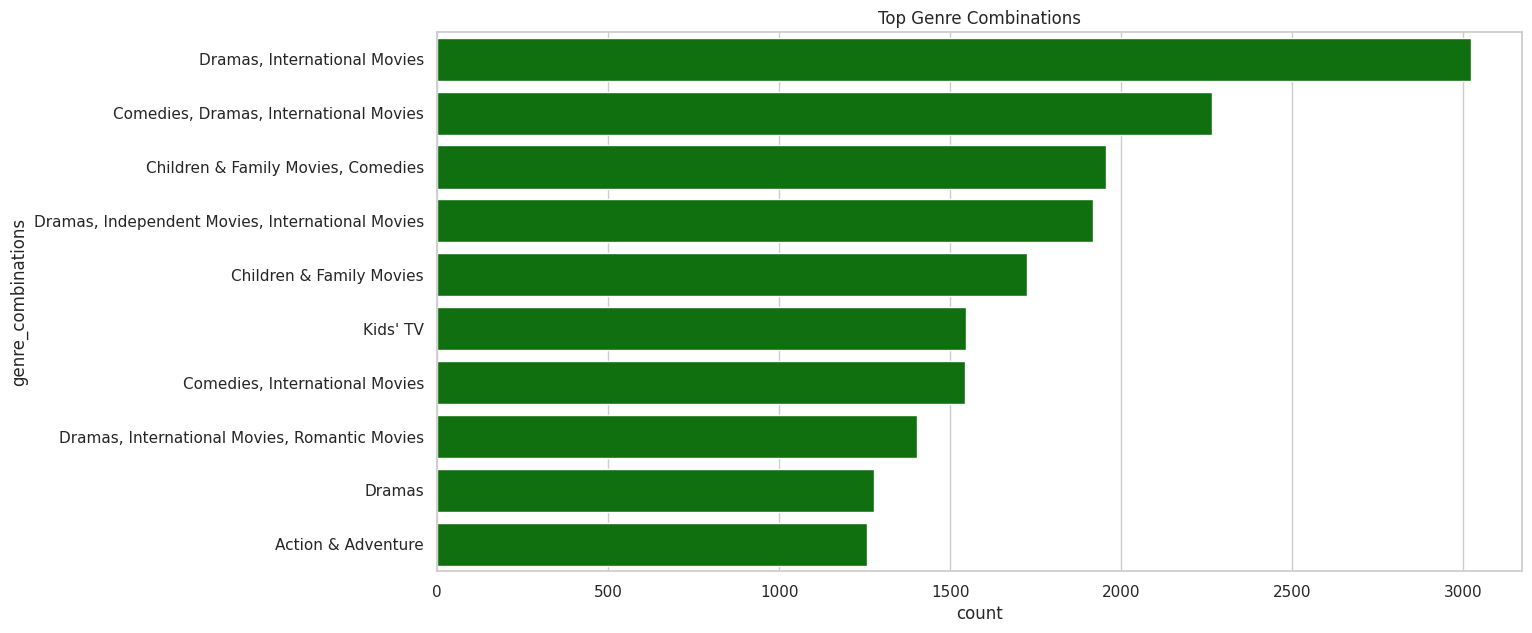

In [ ]:
genre_com=df_clean1['listed_in'].value_counts().reset_index()
genre_com.columns=['genre_combinations','count']


top_genre_com=genre_com.head(10)


plt.figure(figsize=(14,7))
sns.barplot(data=top_genre_com,x='count',y='genre_combinations',color='green')
plt.title("Top Genre Combinations")
plt.show()


**17. Explore how the themes or topics of content have evolved over time based on the analysis of titles and descriptions. Are there noticeable shifts in the types of stories being told?**


18.  Compare the distribution of genres and ratings between Netflix original content and licensed content. Are there any noticeable differences in content focus or target audience?


In [ ]:
genre_distribution = df_clean1.groupby(['type', 'listed_in']).size().reset_index(name='count').nlargest(10,'count')

# Group by rating and type to count the number of titles for each combination
rating_distribution = df_clean1.groupby(['type', 'rating']).size().reset_index(name='count')

# Create bar plot for genre distribution
plt.figure(figsize=(14, 7))
sns.barplot(data=genre_distribution, x='count', y='listed_in', hue='type', palette='viridis')
plt.title("Genre Distribution: TV Shows vs Movies")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.legend(title="Type")
plt.show()

**19. Analyze how the diversity of content, considering genres, countries of origin, and representation, has changed over time.**
**bold text**

In [ ]:
diversity_trend = df_clean1.groupby(['release_year', 'country', 'listed_in']).size().reset_index(name='count')
diversity_metrics = diversity_trend.groupby('release_year').agg(
    unique_genres=('listed_in', 'nunique'),
    unique_countries=('country', 'nunique'),
    total_content=('count', 'sum')
).reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=diversity_metrics, x='release_year', y='unique_genres', marker='o', label='Unique Genres')
sns.lineplot(data=diversity_metrics, x='release_year', y='unique_countries', marker='o', label='Unique Countries')
plt.title('Diversity of Content Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Unique Genres/Countries')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
genre_counts_per_year = df_clean1.groupby('release_year')['listed_in'].value_counts()
# Access the index levels instead of trying to access them as columns
plt.figure(figsize=(10, 6))
plt.plot(genre_counts_per_year.index.get_level_values('release_year'), genre_counts_per_year.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Genres')
plt.title('Genre Diversity Over Time')
plt.show()

In [ ]:
no_of_titles_per_year=df_clean1.groupby('release_year')['title'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y=no_of_titles_per_year,data=df_clean1)
plt.xlabel('country')
plt.ylabel('Number of Titles')
plt.title('Content Distribution by Country')
plt.xticks(rotation=45)
plt.show()